In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

2023-08-10 17:08:01.261123: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 17:08:01.985014: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 17:08:01.994586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 17:08:04.878833: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('loan_sanction_train.csv', header = 'infer')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df = df.dropna()

In [6]:
df['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [7]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [8]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [9]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [10]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [11]:
df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [12]:
#AverageLoanAmount
df['LoanAmount'].mean()*1000

144735.4166666667

In [13]:
df.groupby(['Loan_Status','Property_Area']).count()

Loan_ID  Gender  Married  Dependents  Education  \
Loan_Status Property_Area                                                    
N           Rural               54      54       54          54         54   
            Semiurban           42      42       42          42         42   
            Urban               52      52       52          52         52   
Y           Rural               85      85       85          85         85   
            Semiurban          149     149      149         149        149   
            Urban               98      98       98          98         98   

                           Self_Employed  ApplicantIncome  CoapplicantIncome  \
Loan_Status Property_Area                                                      
N           Rural                     54               54                 54   
            Semiurban                 42               42                 42   
            Urban                     52               52                 52   
Y           Rural                     85               85                 85   
            Semiurban                149              149                149   
            Urban                     98               98                 98   

                           LoanAmount  Loan_Amount_Term  Credit_History  
Loan_Status Property_Area                                                
N           Rural                  54                54              54  
            Semiurban              42                42              42  
            Urban                  52                52              52  
Y           Rural                  85                85              85  
            Semiurban             149               149             149  
            Urban                  98                98              98

In [14]:
df.groupby(['Loan_Status','Gender']).count()

Loan_ID  Married  Dependents  Education  Self_Employed  \
Loan_Status Gender                                                           
N           Female       32       32          32         32             32   
            Male        116      116         116        116            116   
Y           Female       54       54          54         54             54   
            Male        278      278         278        278            278   

                    ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Gender                                                   
N           Female               32                 32          32   
            Male                116                116         116   
Y           Female               54                 54          54   
            Male                278                278         278   

                    Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status Gender                                                   
N           Female                32              32             32  
            Male                 116             116            116  
Y           Female                54              54             54  
            Male                 278             278            278

In [15]:
df.groupby(['Loan_Status','Married']).count()

Loan_ID  Gender  Dependents  Education  Self_Employed  \
Loan_Status Married                                                          
N           No            64      64          64         64             64   
            Yes           84      84          84         84             84   
Y           No           105     105         105        105            105   
            Yes          227     227         227        227            227   

                     ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Married                                                   
N           No                    64                 64          64   
            Yes                   84                 84          84   
Y           No                   105                105         105   
            Yes                  227                227         227   

                     Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status Married                                                   
N           No                     64              64             64  
            Yes                    84              84             84  
Y           No                    105             105            105  
            Yes                   227             227            227

In [16]:
df.groupby(['Loan_Status','Dependents']).count()

Loan_ID  Gender  Married  Education  Self_Employed  \
Loan_Status Dependents                                                       
N           0                87      87       87         87             87   
            1                28      28       28         28             28   
            2                20      20       20         20             20   
            3+               13      13       13         13             13   
Y           0               187     187      187        187            187   
            1                52      52       52         52             52   
            2                65      65       65         65             65   
            3+               28      28       28         28             28   

                        ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Dependents                                                   
N           0                        87                 87          87   
            1                        28                 28          28   
            2                        20                 20          20   
            3+                       13                 13          13   
Y           0                       187                187         187   
            1                        52                 52          52   
            2                        65                 65          65   
            3+                       28                 28          28   

                        Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status Dependents                                                   
N           0                         87              87             87  
            1                         28              28             28  
            2                         20              20             20  
            3+                        13              13             13  
Y           0                        187             187            187  
            1                         52              52             52  
            2                         65              65             65  
            3+                        28              28             28

In [17]:
df.groupby(['Loan_Status','Self_Employed']).count()

Loan_ID  Gender  Married  Dependents  Education  \
Loan_Status Self_Employed                                                    
N           No                 125     125      125         125        125   
            Yes                 23      23       23          23         23   
Y           No                 289     289      289         289        289   
            Yes                 43      43       43          43         43   

                           ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Self_Employed                                                   
N           No                         125                125         125   
            Yes                         23                 23          23   
Y           No                         289                289         289   
            Yes                         43                 43          43   

                           Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status Self_Employed                                                   
N           No                          125             125            125  
            Yes                          23              23             23  
Y           No                          289             289            289  
            Yes                          43              43             43

In [18]:
df.groupby(['Loan_Status','Education']).count()

Loan_ID  Gender  Married  Dependents  Self_Employed  \
Loan_Status Education                                                           
N           Graduate          112     112      112         112            112   
            Not Graduate       36      36       36          36             36   
Y           Graduate          271     271      271         271            271   
            Not Graduate       61      61       61          61             61   

                          ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Education                                                      
N           Graduate                  112                112         112   
            Not Graduate               36                 36          36   
Y           Graduate                  271                271         271   
            Not Graduate               61                 61          61   

                          Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status Education                                                      
N           Graduate                   112             112            112  
            Not Graduate                36              36             36  
Y           Graduate                   271             271            271  
            Not Graduate                61              61             61

In [19]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5730.189189,1773.081081,153.378378,342.810811,0.574324
Y,5201.093373,1495.508795,140.882530,341.710843,0.978916


In [20]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)
df['Education'].replace({'Not Graduate': 0, 'Graduate': 1}, inplace=True)
df['Property_Area'].replace({'Rural': 0, 'Urban': 1, 'Semiurban':2}, inplace=True)
df['Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [21]:
df = df.reset_index(drop = True)

In [22]:
df.Dependents.replace({'3+': 3}, inplace=True)

In [23]:
df.Dependents = df.Dependents.astype(int)

<AxesSubplot:>

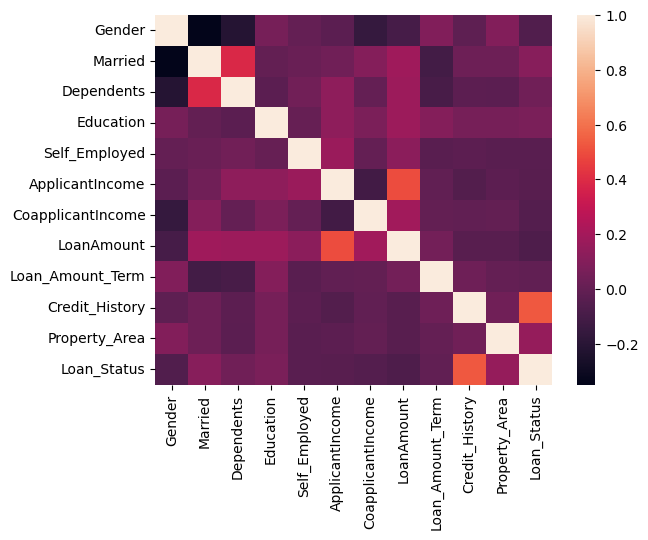

In [24]:
sns.heatmap(df.corr())

From the correlation matrix, the credit history matters for a loan approval and Applicant Income is positively impacting the loan amount

In [25]:
X = df.iloc[:,1:-1]

In [26]:
y = df['Loan_Status']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
X_test_scaled = scaler.transform(X_test)

In [31]:
logReg = LogisticRegression()
gauNB = GaussianNB()
svc=SVC()
dectree=DecisionTreeClassifier()
ranfor=RandomForestClassifier()
adaBC=AdaBoostClassifier()
models=[logReg,gauNB,svc,dectree,ranfor,adaBC]
for amodel in models:
    amodel.fit(X_train_scaled,y_train)
    y_pred = amodel.predict(X_test_scaled)
    print(amodel)
    print(classification_report(y_test,y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.80      0.98      0.88        66

    accuracy                           0.82        96
   macro avg       0.87      0.73      0.75        96
weighted avg       0.84      0.82      0.80        96

GaussianNB()
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        30
           1       0.81      0.95      0.88        66

    accuracy                           0.81        96
   macro avg       0.82      0.73      0.75        96
weighted avg       0.82      0.81      0.80        96

SVC()
              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.80      0.98      0.88        66

    accuracy                           0.82        96
   macro avg       0.87      0.73      0.75        96
weighted avg       0.84      0.82 

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
]);

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mse', 
              metrics=['mse', 'mae'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
EPOCHS = 9999 # stop early
BATCHES = None
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(X_train_scaled, y_train, 
                            epochs=EPOCHS, 
                            callbacks=[stop_early], 
                            verbose=0)

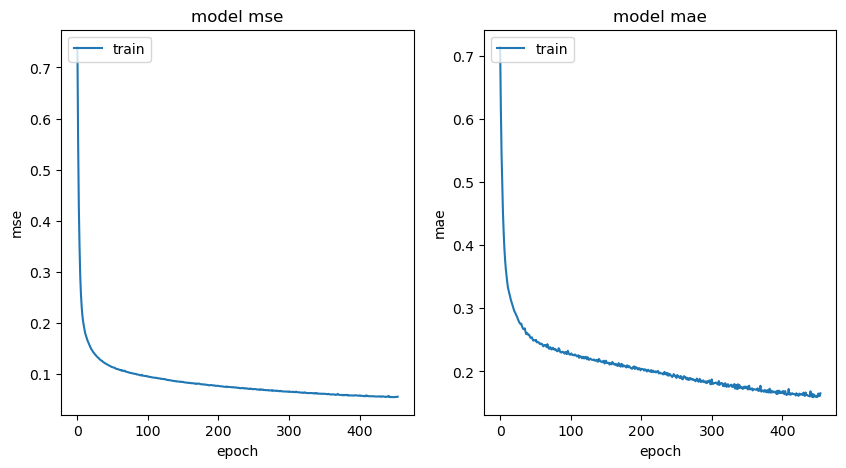

In [35]:
fig = plt.figure(figsize=(10, 5))
for idx, key in enumerate(['mse', 'mae']):
    ax = fig.add_subplot(1, 2, idx+1)
    plt.plot(history.history[key])
    plt.title('model {}'.format(key))
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left');

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

y_pred = model.predict(X_test_scaled)
y_pred = [1 if item >= 0.5 else 0 for item in y_pred]

3/3 [==============================] - 0s 3ms/step


In [37]:
accuracy_score(y_pred, y_test)

0.78125

In [38]:
confusion_matrix(y_pred,y_test)

array([[21, 12],
       [ 9, 54]])

In [39]:
f1_score(y_pred,y_test)

0.8372093023255814